# Analysis of Variance (ANOVA)

In [1]:
from IPython.display import Image

ANOVA tests whether there are any statistically significant differences between the means of three or more independent groups. If running ANOVA with only two groups, it is identical to running a two-sample ttest.

For comparing equality of all means, the full model is the one that has a separate mean for each group. The reduced model, obtained from the full model by supposing the hypothesis of equal means is true, specifies a single mean for all populations. When thinking about ANOVA, it sounds like we are making inference about the variance, however we are making inference about the means using the idea of between and within group variance. 

The idea is to first build an ANOVA table to compare the reduced model (i.e. equal means model) with the full model (i.e. separate means model). The equal means model uses only one degree of freedom and uses the grand mean to compute the sum squared errors. The separate means model looks at the within variation with the degrees of freedom being the sample size minus the number of estimated parameters (i.e. each sample being represented by their respected mean). Als note, the more degrees of freedom we have estimating the error, the more power we have (i.e. less chance of making type I error). We have also look at the $r^{2}$ value too, which shows the amount of variation explained by the equal separate means model (i.e. Full Model).

Next, we can build an extra ANOVA table (i.e. BYOA) which allows us to now see what advantage does the separate means model have over the equal means model. So here we are comparing the within group SSE and between group (i.e. the model) SSE. The test statistic is the F-statistic, which is the ratio of the $MSE_{between}$ and the $MSE_{within}$. For high F-critical values and low p-values (i.e. < 0.05), if we rescrambled the data 1000 times, there would be a really small chance where the means would all be equal. Thus, providing evidence against the null and concluding at least one of the means are different. 

**Null Hypothesis:** 

- $H_{o}: \mu_{1} = \mu_{2} = \mu_{3}$

- Under the null hypothesis, the distributions have the same mean, and thus can be represented by the grand mean, which is just the total mean of the 'n' distributions (i.e. Equal Means Model)

- If reject the null, we assume atleast one of the means comes from a different distribution


**Assumptions:**

- Normality Similar to Hypothesis Testing, ANOVA is robust to this assumption.


- Extremely long-tailed distributions (outliers) or skewed distributions coupled with different samples sizes present the only serious distributional problems (i.e. small sample sizes)


- Equal Standard Deviations for each sampled population: This assumption is important!!

    - The estimate of the Standard Deviation (again, assuming all are equal) is the RMSE (i.e. Root Mean Square Error).
    - Not robust when sample sizes are same/different to the equality of variance assumption not being met (confidence intervals will either be too large or small). 
    - To test for equal spreads, use test such as Levene's or Brown and Forsythe's test.


- Independence within and across groups are critical


- If not independent, should try another analysis


Will be using scipy.stats one way anova in the code below to illustrate how ANOVA test can be performed in python. 

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


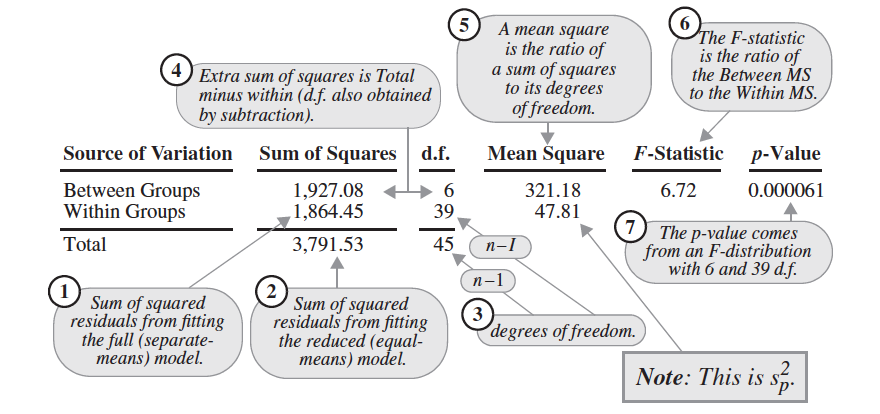

In [3]:
Image('../sources/anova.png')

In [64]:
from scipy.stats import f_oneway
from sklearn import datasets
import seaborn as sns
import pandas as pd
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data= pd.read_csv('data/sports.csv')

In [67]:
bball = data[data['Sport'] == 'Basketball']['Depth']
fball = data[data['Sport'] == 'Football']['Depth']
soccer = data[data['Sport'] == 'Soccer']['Depth']
swim = data[data['Sport'] == 'Swimming']['Depth']
tennis = data[data['Sport'] == 'Tennis']['Depth']

#### Check Equality of Variance Assumptions

In [90]:
def test_variance(*args,significance=0.05):
    
    """ Perform Levene's Test of Equality of Variance -- By default, uses Median"""
    
    print("=== Levene's test of Equal Variance ===")
    
    test = levene(*args)
    print('F-Statistic: ',test[0])
    print('P-Value: ',test[1])
    
    if test[1]<significance:
        print('Reject Null Hypothesis -- Evidence suggest distribution does not have equal spread')
    else:
        print('Fail to Reject Null Hypothesis -- Evidence suggest there is no statistical difference in spread ')
    
def get_boxplot(data,x,y):
    
    "Returns Boxplot -- Examine Equality of Variance"

    plt.figure(figsize=(12,5))
    sns.boxplot(x=x,y=y,data=data,palette='Set3')
    plt.title('Exploratory Analysis: Equality of Variance',fontsize=18,y=1.02)

In [91]:
test_variance(bball,fball,soccer,swim,tennis)

=== Levene's test of Equal Variance ===
F-Statistic:  0.136911151167
P-Value:  0.967206943192
Fail to Reject Null Hypothesis -- Evidence suggest there is no statistical difference in spread 


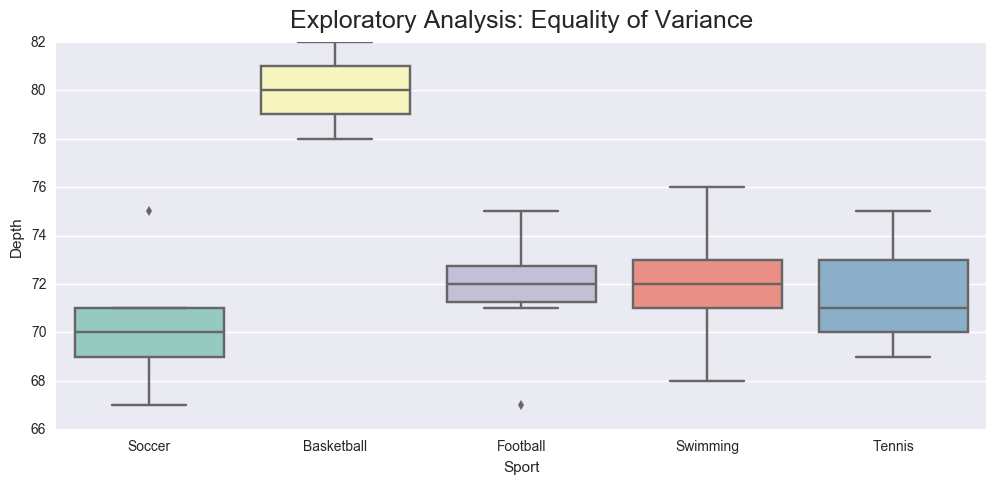

In [92]:
get_boxplot(data,'Sport','Depth')

In [94]:
import numpy as np
chance = np.random.uniform(size=(5, 7))

In [95]:
chance

array([[ 0.4899456 ,  0.151644  ,  0.77375615,  0.51668673,  0.80751921,
         0.28270848,  0.93787824],
       [ 0.25804294,  0.36043796,  0.43228112,  0.1890878 ,  0.72851863,
         0.56551126,  0.38842991],
       [ 0.05668953,  0.51543242,  0.02199057,  0.77118757,  0.50295715,
         0.84417701,  0.3569952 ],
       [ 0.86461188,  0.57065282,  0.78453016,  0.43158649,  0.71910487,
         0.76697006,  0.68535734],
       [ 0.13315237,  0.03630782,  0.25023912,  0.34172829,  0.99657397,
         0.51478233,  0.53941236]])